<a href="https://colab.research.google.com/github/shreesha2304/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In this era of a highly competitive business environment, a company must make effective marketing policies. A company might have several groups of customers. When a company is small, these customer groups are easily identifiable, and each customer is easily targetable. As the company grows, it becomes difficult to analyze customer behavior, and companies cannot give individual attention to different customer requirements. In such a situation, humans cannot make a proper strategy to segregate customers, and a data-driven approach is much needed to make judgments. For a medium or large company, the focus is not only acquiring new customers but also retaining existing customers. Many companies survive only by certain groups of customers loyal to the company. These customers generate high revenues, make promotions, and help the company to set up newer benchmarks. When the resources are limited, a company cannot invest too much in customers and it becomes crucial to identify those loyal customers. Moreover, companies must focus on preventing customer churn by resolving the issue of these dissatisfied customers. Hence, companies perform customer segmentation.

In [1]:
#first let's import the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import datetime
import math

In [2]:
#upgrading the drive not to get error while reading excel file
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 6.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#reading the dataset
df = pd.read_excel('/content/drive/My Drive/AlmaBetter/Capstone Project 4/Online Retail.xlsx')

In [5]:
#a glance through the first five rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
#a glance through the last five rows of the dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
#checking the names of the columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [25]:
#checking the number of rows and columns
df.shape

(541909, 8)

We have 541909 rows and 8 columns in our dataset.

In [5]:
#checking the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Null values are due to inefficient data capturing and are not suitable for analysis. Hence we should check for null values and treat them appropriately.

In [6]:
#checking the total number of null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We can see that the columns 'Description' and 'CustomerID' have several null values. We can not replace them with any other values and we will remove them.

In [7]:
#removing the entries with null values
df=df.dropna(axis=0)

Let's check whether our dataset contains duplicated entries.

In [8]:
#duplicated entries
df.duplicated().sum()

5225

In [9]:
#removing the duplicated entries
df.drop_duplicates(inplace=True)

In [10]:
#getting the statistical information of numerical columns
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


We have some orders with negative Quantity.

In [9]:
#checking the orders with negative quantity
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


These orders were returned or canceled. Hence we will remove them.

In [11]:
df=df[df['Quantity']>=0]
df=df[df['UnitPrice']>=0]



In [101]:
#after cleaning, checking the statistical information
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [11]:
#Let's check the countries from which the customers are from.
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

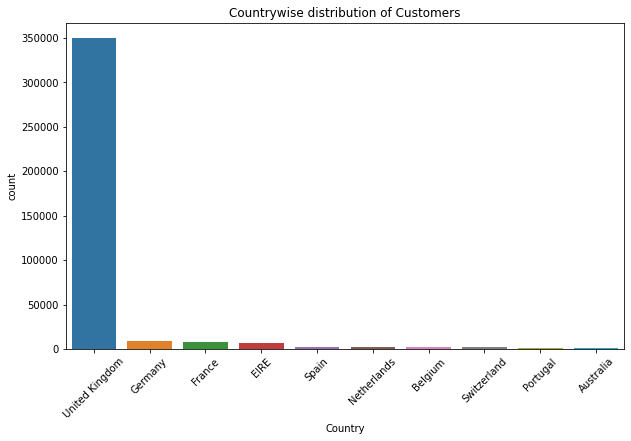

In [12]:
#plotting the top ten countries with maximum number of customers
plt.figure(figsize=(10,6))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().iloc[:10].index)
plt.title('Countrywise distribution of Customers')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

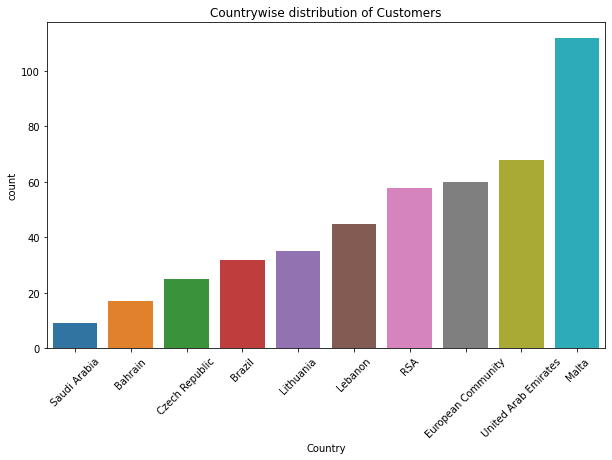

In [23]:
#checking the countries with least number of customers
plt.figure(figsize=(10,6))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().iloc[-1:-11:-1].index)
plt.title('Countrywise distribution of Customers')
plt.xticks(rotation=45)

We observe most customers are from the United Kingdom, followed by Germany. A large proportion of customers is from the UK, whereas customers from other countries make up only a smaller proportion. Saudi Arabia has the least number of cusomers.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

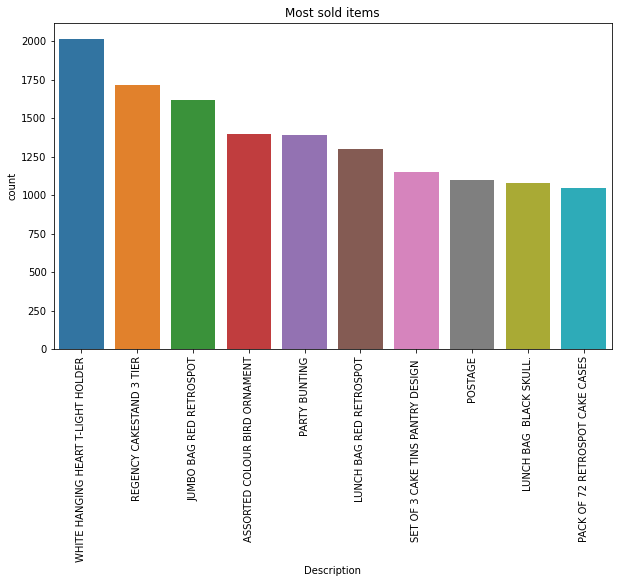

In [39]:
#Let's find which items sold the most. 
plt.figure(figsize=(10,6))
sns.countplot(x='Description', data=df, order=df['Description'].value_counts().iloc[:10].index)
plt.title("Most sold items")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

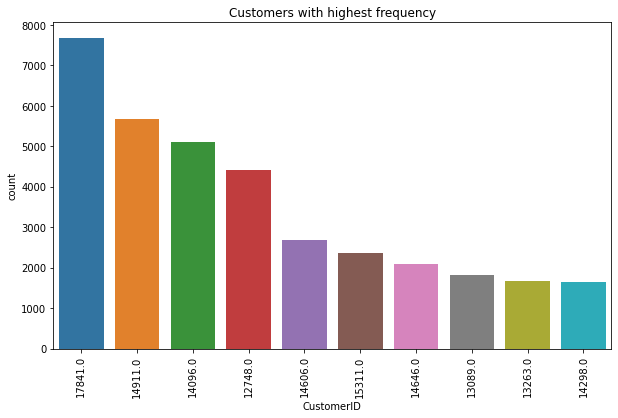

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='CustomerID', data=df, order=df['CustomerID'].value_counts().iloc[:10].index)
plt.title("Customers with highest frequency")
plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Description', data=df, order=df['Description'].value_counts().iloc[:10].index)
plt.title("Most sold items")
plt.xticks(rotation=90)

 We have many items whose only one unit has been sold.

In [102]:
#for our further analysis, we will breakdown the InvoiceDate into different parts
df['year']=df['InvoiceDate'].dt.year  #extracting year
df['month']=df['InvoiceDate'].dt.month  #extracting month
df['date']=df['InvoiceDate'].dt.day  #extracting date
df['day_of_week']=df['InvoiceDate'].dt.weekday #extracting the day of week,monday is 0, sunday is 6
df['hour']=df['InvoiceDate'].dt.hour #extracting the hour
df['min']=df['InvoiceDate'].dt.minute #extracting the minute


In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,day_of_week,hour,min
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,2,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,4,12,50
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,4,12,50
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,4,12,50
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,4,12,50


Text(0.5, 1.0, 'Year-wise Distribution of Sales')

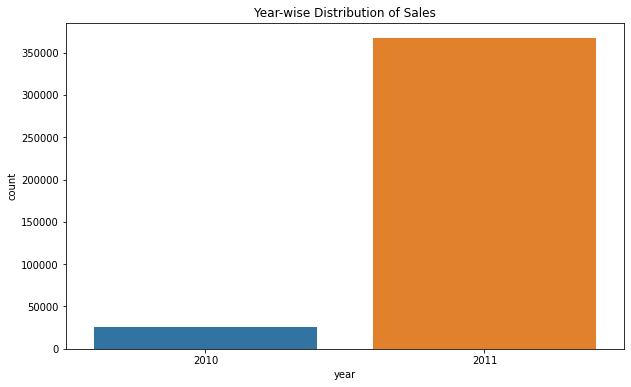

In [40]:
#let's find the yearwise distribution of sales
plt.figure(figsize=(10,6))
sns.countplot(x='year',data=df)
plt.title('Year-wise Distribution of Sales')

2011 was the year with the highest number of sales.

Text(0.5, 1.0, 'Month-Wise distribution of Sales')

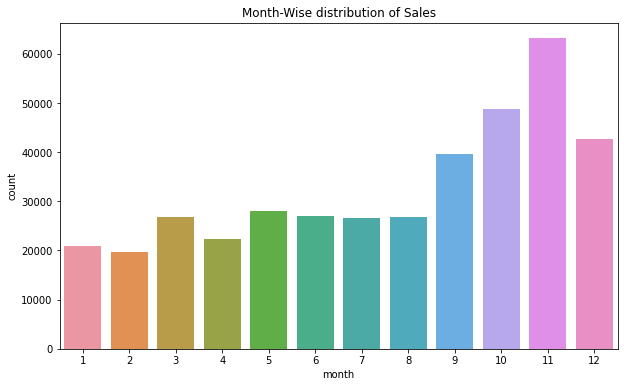

In [41]:
#let's find the monthwise distribution of sales
plt.figure(figsize=(10,6))
sns.countplot(x='month', data=df)
plt.title('Month-Wise distribution of Sales')

November was the month with the maximum number of sales. We can also observe that most sales occurred in the ending months of the year.

Text(0.5, 1.0, 'Day-Wise distribution of Sales')

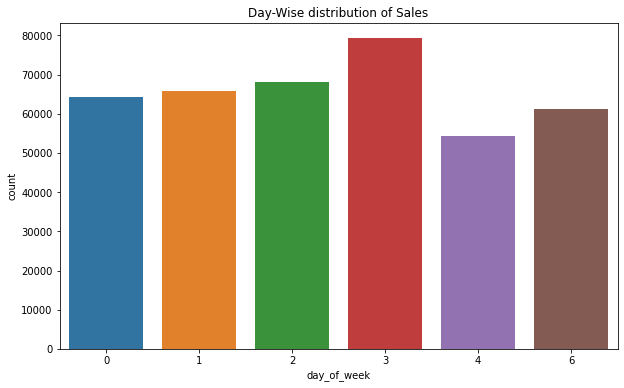

In [42]:
#let's find the daywise distribution of sales
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week',data=df)
plt.title('Day-Wise distribution of Sales')

The highest sales occurred on Thursday, while on Friday, the least sales were recorded. We can note that there were no sales on Saturday.

Text(0.5, 1.0, 'Date-Wise distribution of Sales')

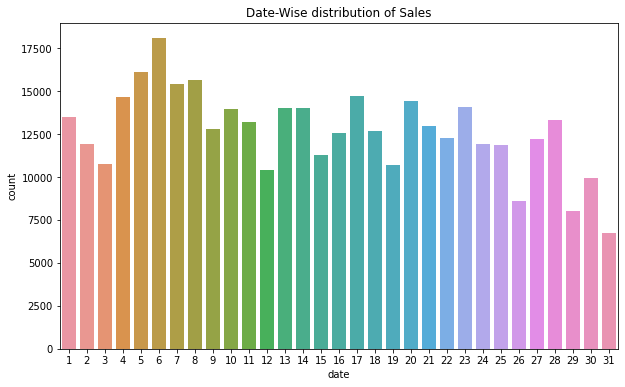

In [43]:
#let's find the datewise distribution of sales
plt.figure(figsize=(10,6))
sns.countplot(x='date',data=df)
plt.title('Date-Wise distribution of Sales')

Most sales were recorded at the beginning of the month.

Text(0.5, 1.0, 'Hourly distribution of Sales')

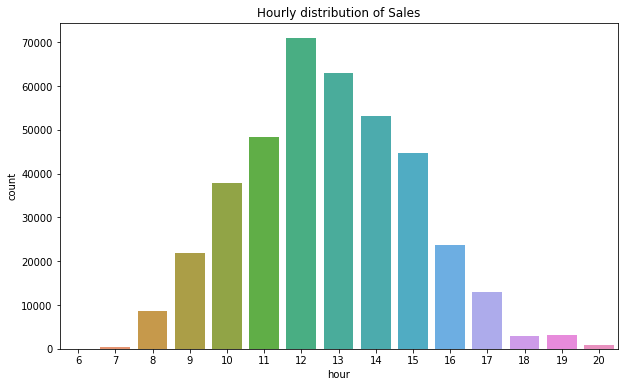

In [44]:
#hourly distribution of sales
plt.figure(figsize=(10,6))
sns.countplot(x='hour',data=df)
plt.title('Hourly distribution of Sales')

In the afternoon, more sales were recorded. There were no sales before 6 AM and after 8 PM.

In [103]:
#calculating the net amount
df['net_amount']=df['Quantity']*df['UnitPrice']

Text(0.5, 1.0, 'Countries with Maximum transaction')

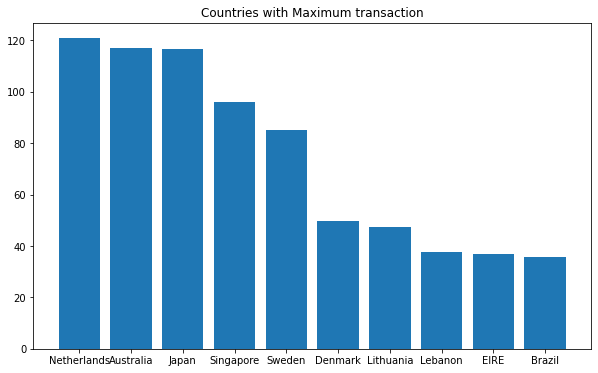

In [14]:
#find out the countries with maximum transcation
country_amt=pd.DataFrame(df.groupby(['Country'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()
plt.figure(figsize=(10,6))
plt.bar(x=country_amt['Country'].iloc[:10], height=country_amt['net_amount'].iloc[:10])
plt.title('Countries with Maximum transaction')

The Netherlands is the country that generates the highest revenue for the company.

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,year,month,date,day_of_week,hour,min,net_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,1,2,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,1,2,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,2011,12,9,4,12,50,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,2011,12,9,4,12,50,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,2011,12,9,4,12,50,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,2011,12,9,4,12,50,16.60


Text(0.5, 1.0, 'Monthly trasncation')

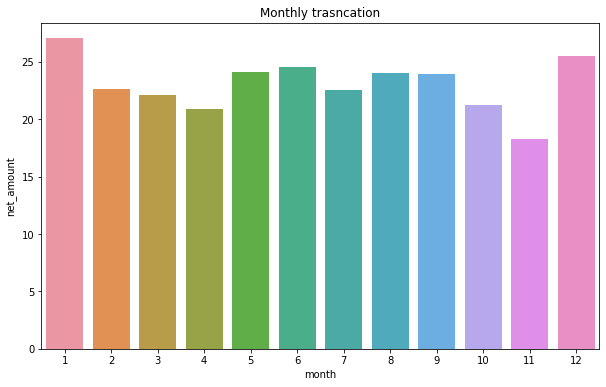

In [15]:
#fidning out the months withmaximum transactions
monthly_amt=pd.DataFrame(df.groupby(['month'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_amt['month'], y=monthly_amt['net_amount'])
plt.title('Monthly trasncation')


We can see that in the month of January, maximum transaction was occured.

Text(0.5, 1.0, 'Weekday-wise transactions')

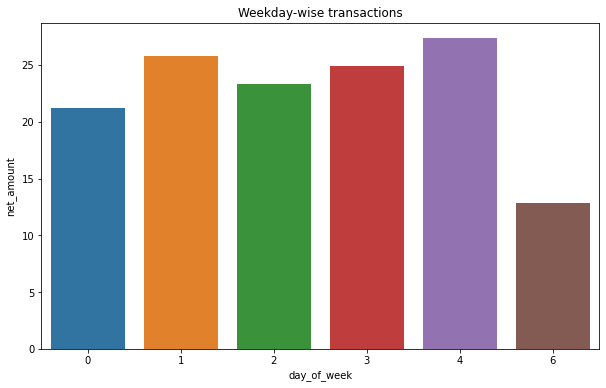

In [16]:
#checking the weekday-wise transaction
weekday_amt=pd.DataFrame(df.groupby(['day_of_week'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=weekday_amt['day_of_week'], y=weekday_amt['net_amount'])
plt.title('Weekday-wise transactions')

On fridays, net transaction was the highest. Sunday is the day in which net transaction was the least.

Text(0.5, 1.0, 'Date-wise transaction amount')

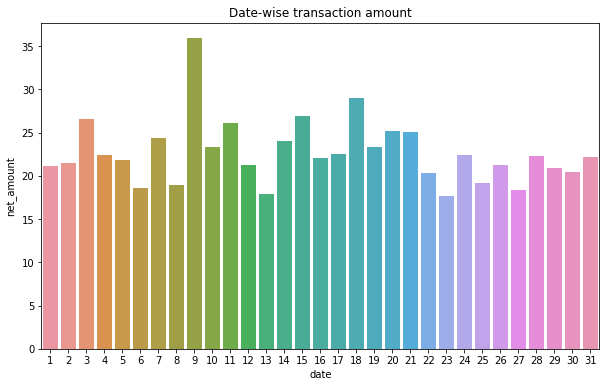

In [17]:
#checking the dates where net transaction was highest
date_amt=pd.DataFrame(df.groupby(['date'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=date_amt['date'], y=date_amt['net_amount'])
plt.title('Date-wise transaction amount')

Text(0.5, 1.0, 'Hourly transaction amount')

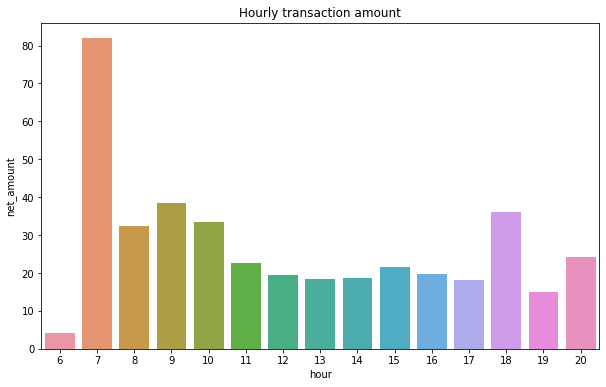

In [18]:
#hourly transaction amount
hourly_amt=pd.DataFrame(df.groupby(['hour'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_amt['hour'], y=hourly_amt['net_amount'])
plt.title('Hourly transaction amount')

We can see that at 7AM, net transaction was the highest.

For a company, it is crucial to find some important parameters regarding each customer. We will be performing RFM analysis (Recency, Frequency, Monetary Analysis). It is a method to rank the customers based on recency, frequency of purchase, and the net amount of transactions. This helps the company to segregate the customers into different clusters.

In [104]:
#calculating the frequency of each customer
cust_freq=df.groupby(['CustomerID']).InvoiceNo.count().reset_index()
cust_freq.rename(columns={'InvoiceNo':'Frequency'},inplace=True)

In [105]:
#transaction amount for each customer
cust_trans=df.groupby(['CustomerID']).net_amount.sum().reset_index()
cust_trans.rename(columns={'net_amount':'total_amount'},inplace=True)

In [106]:
#joining these two tables to form newer one.
customer_info=pd.merge(cust_freq,cust_trans,on='CustomerID')

In [107]:
customer_info

,CustomerID,Frequency,total_amount
0,12346.0,1,77183.60
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40
...,...,...,...
4334,18280.0,10,180.60
4335,18281.0,7,80.82
4336,18282.0,12,178.05
4337,18283.0,721,2045.53


In [108]:
#to calculate the recent purchase date, we can subtract the dates of last purchases from the latest date
df['time_diff']=df['InvoiceDate'].max()-df['InvoiceDate']

In [109]:
#forming a database
time_diff_df=df.groupby(['CustomerID']).time_diff.min().reset_index()
time_diff_df.rename(columns={'time_diff':'recent_purchase'},inplace=True)


In [110]:
#merging it with the previous dataframe to get final required data
df_new=pd.merge(customer_info,time_diff_df, on='CustomerID')

In [111]:
df_new

,CustomerID,Frequency,total_amount,recent_purchase
0,12346.0,1,77183.60,325 days 02:49:00
1,12347.0,182,4310.00,1 days 20:58:00
2,12348.0,31,1797.24,74 days 23:37:00
3,12349.0,73,1757.55,18 days 02:59:00
4,12350.0,17,334.40,309 days 20:49:00
...,...,...,...,...
4334,18280.0,10,180.60,277 days 02:58:00
4335,18281.0,7,80.82,180 days 01:57:00
4336,18282.0,12,178.05,7 days 01:07:00
4337,18283.0,721,2045.53,3 days 00:48:00


In [112]:
#recent purchase in terms of days
df_new['recent_purchase'] = df_new['recent_purchase'].dt.days

For our further analysis, this will be the input. Let's check the distribution of these input columns. If we have any anomalies, we need to deal with them.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


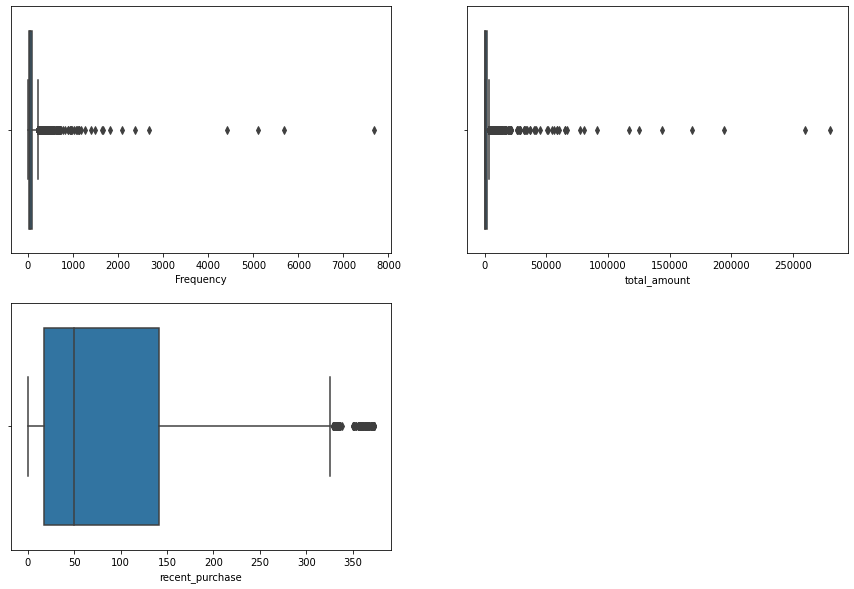

In [55]:
#plotting boxplots to check the distribution
plt.figure(figsize=(15,10))
n =1;
for i in df_new.columns[1:]:
  plt.subplot(2,2,n)
  sns.boxplot(df_new[i])
  n+=1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


19.341402694657173

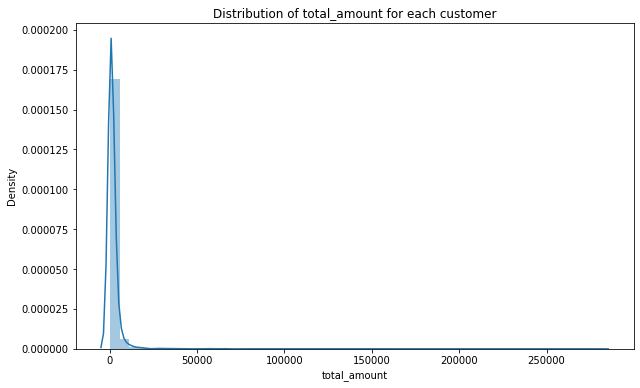

In [22]:
#distribution of total amount
plt.figure(figsize=(10,6))
sns.distplot(df_new['total_amount'])
plt.title('Distribution of total_amount for each customer')
df_new['total_amount'].skew()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


18.04361895830862

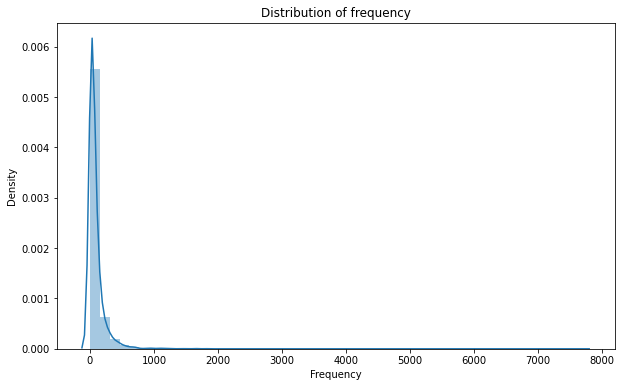

In [23]:
#distribution of frequnecy
plt.figure(figsize=(10,6))
sns.distplot(df_new['Frequency'])
plt.title('Distribution of frequency')
df_new['Frequency'].skew()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.2463568823921842

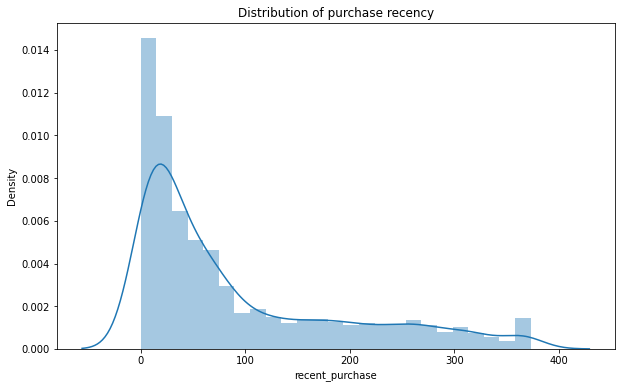

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(df_new['recent_purchase'])
plt.title('Distribution of purchase recency')
df_new['recent_purchase'].skew()

All three columns are skewed. Also there are outliers present in each column. We can remove them by quartile method.

In [113]:
#removing outliers for frequency
q1 = np.percentile(df_new['Frequency'],25)
q2 = np.percentile(df_new['Frequency'],50)
q3 = np.percentile(df_new['Frequency'],75)
iqr_f=q3 -q1
llimit_f=q1-(1.5*iqr_f)
ulimit_f=q3+(1.5*iqr_f)
df_new=df_new[df_new['Frequency']>llimit_f]
df_new=df_new[df_new['Frequency']<ulimit_f]

In [114]:
#removing outliers for recent_purchase
q1 = np.percentile(df_new['recent_purchase'],25)
q2 = np.percentile(df_new['recent_purchase'],50)
q3 = np.percentile(df_new['recent_purchase'],75)
iqr_r=q3 -q1
llimit_r=q1-(1.5*iqr_r)
ulimit_r=q3+(1.5*iqr_r)
df_new=df_new[df_new['recent_purchase']>llimit_r]
df_new=df_new[df_new['recent_purchase']<ulimit_r]

In [115]:
#removing outliers for total_amount
q1 = np.percentile(df_new['total_amount'],25)
q2 = np.percentile(df_new['total_amount'],50)
q3 = np.percentile(df_new['total_amount'],75)
iqr_t=q3 -q1
llimit_t=q1-(1.5*iqr_t)
ulimit_t=q3+(1.5*iqr_t)
df_new=df_new[df_new['total_amount']>llimit_t]
df_new=df_new[df_new['total_amount']<ulimit_t]

To reduce the skewness, we can take the square root of each feature.

In [116]:
#applying square root 
df_new['Frequency_sqrt'] = df_new['Frequency'].apply(np.sqrt)
df_new['recent_purchase_sqrt'] = df_new['recent_purchase'].apply(np.sqrt)
df_new['total_amount_sqrt']=df_new['total_amount'].apply(np.sqrt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

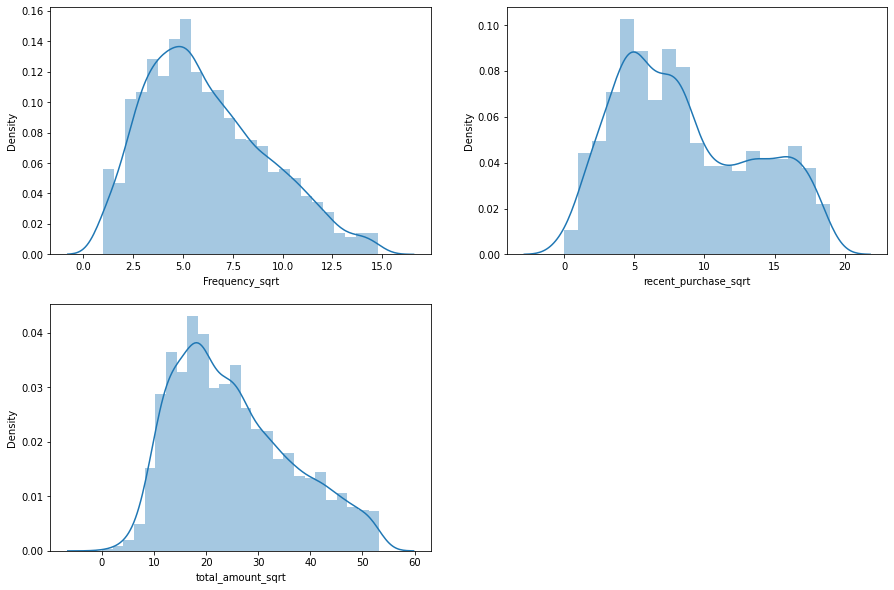

In [29]:
#checking the distribution after taking squareroot
plt.figure(figsize=(15,10))
n =1;
for i in ['Frequency_sqrt','recent_purchase_sqrt','total_amount_sqrt']:
  plt.subplot(2,2,n)
  sns.distplot(df_new[i])
  n+=1

In [30]:
#checking the skewness
for i in ['Frequency_sqrt','recent_purchase_sqrt','total_amount_sqrt']:
  print(f'Coefficient of Skewness for {i} is {df_new[i].skew()}')

Coefficient of Skewness for Frequency_sqrt is 0.5607688638058589
Coefficient of Skewness for recent_purchase_sqrt is 0.40821773591665855
Coefficient of Skewness for total_amount_sqrt is 0.5714326406072351


In [117]:
#standardizing the values of the features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
required_df=df_new[['Frequency_sqrt','recent_purchase_sqrt','total_amount_sqrt']]
df_final=scaler.fit_transform(required_df)

In [118]:
df_final

array([[0.33102983, 0.45338235, 0.79597073],
       [0.54672048, 0.2236068 , 0.78713261],
       [0.22633417, 0.92646281, 0.34334221],
       ...,
       [0.11926902, 0.70710678, 0.16879263],
       [0.17857558, 0.13944334, 0.25053306],
       [0.53386389, 0.34156503, 0.80478845]])

In [119]:
df_final=pd.DataFrame(df_final)

In [120]:
#renaming the columns
df_final.rename(columns={0:'Frequency_sqrt',1:'recent_purchase_sqrt',2:'total_amount_sqrt'},inplace=True)

In [121]:
#final required dataframe
df_final

,Frequency_sqrt,recent_purchase_sqrt,total_amount_sqrt
0,0.331030,0.453382,0.795971
1,0.546720,0.223607,0.787133
2,0.226334,0.926463,0.343342
3,0.595677,0.311805,0.939914
4,0.072471,0.750925,0.177129
...,...,...,...
3548,0.144942,0.450309,0.247596
3549,0.156702,0.877180,0.252321
3550,0.119269,0.707107,0.168793
3551,0.178576,0.139443,0.250533


We will use K-Means clustering for modeling. We need to find the optimum number of clusters, which can be found by the Elbow method and Silhouette Score.

In [122]:
#fitting k-means and finding the wcss score for each value of k
from sklearn.cluster import KMeans
ssd = [] #to store wcss scores
for i in range(1,23):
    
    kmeans = KMeans(n_clusters=i) #initializing k-means with i clusters
    kmeans.fit(df_final.iloc[:,:3]) #fitting the model with dataset
    ssd.append(kmeans.inertia_) #appending the wcss score in list

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Elbow Method')

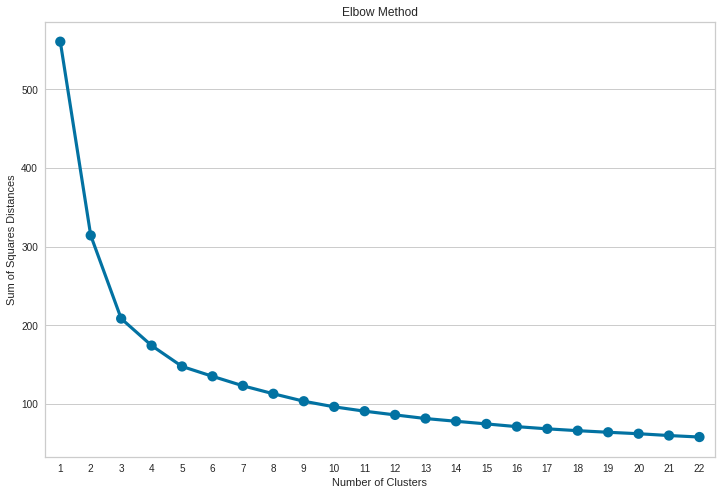

In [65]:
#plotting the figure for elbow method
plt.figure(figsize=(12,8))
sns.pointplot(np.arange(1,23),ssd)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Distances')
plt.title('Elbow Method')

From the graph, we can see that when the number of clusters is 4, the curve becomes somewhat parallel with the x-axis. 

In [123]:
#randomly checking  for n=6
kmeans = KMeans(n_clusters=6, max_iter=50)
kmeans.fit(df_final)

KMeans(max_iter=50, n_clusters=6)

In [124]:
#let's check how clusters are assigned for each row
df_final['ClusterNo'] = kmeans.labels_
df_final.head()

,Frequency_sqrt,recent_purchase_sqrt,total_amount_sqrt,ClusterNo
0,0.331030,0.453382,0.795971,1
1,0.546720,0.223607,0.787133,3
2,0.226334,0.926463,0.343342,2
3,0.595677,0.311805,0.939914,3
4,0.072471,0.750925,0.177129,2


In [125]:
#checking the customers in different clusters
df_final['ClusterNo'].value_counts()

2    825
4    821
0    652
1    514
3    488
5    253
Name: ClusterNo, dtype: int64

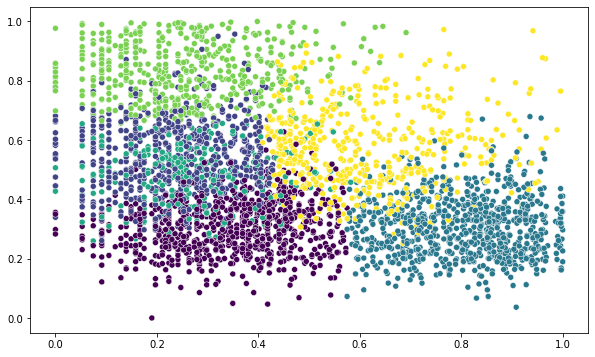

In [35]:
#plotting the scatterplot to visualize these clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=np.array(df_final)[:, 1],y=np.array(df_final)[:, 2], c=kmeans.labels_)

As expected, the extent of clustering is not too great.

To find the optimum number of customers, let's find the silhouette score for each number of clusters. As observed from the graph, 3 to 10 clusters will be suitable and we need to find the best one.

In [126]:
#finding the silhouette score 
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    kmeans_1 = KMeans(n_clusters=n_clusters)
    preds = kmeans_1.fit_predict(df_final.iloc[:,:3])
    centers = kmeans_1.cluster_centers_

    score = silhouette_score(df_final.iloc[:,:3], preds)
    print("silhoutte score is {} for n clusters={}".format(score, n_clusters))

silhoutte score is 0.3702875239938246 for n clusters=3
silhoutte score is 0.3528021052944061 for n clusters=4
silhoutte score is 0.32473039932052883 for n clusters=5
silhoutte score is 0.3196529178920309 for n clusters=6
silhoutte score is 0.2905181565496759 for n clusters=7
silhoutte score is 0.2940063368673435 for n clusters=8
silhoutte score is 0.2769665225736871 for n clusters=9
silhoutte score is 0.2691083531030274 for n clusters=10


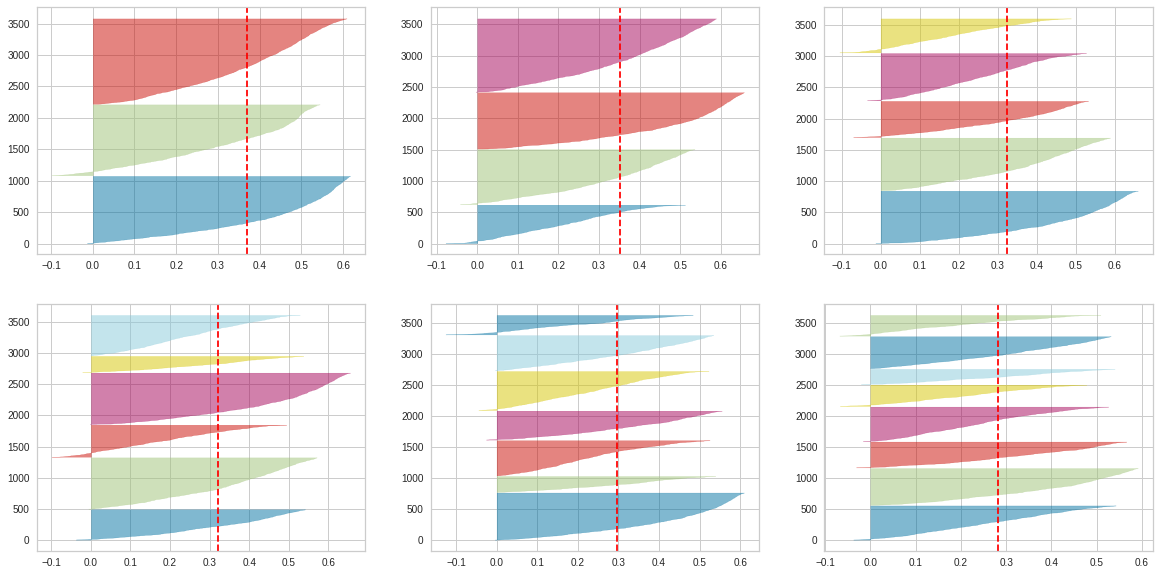

In [35]:
#to visualize the silhouette
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 3, figsize=(20,10))
for i in [ 3, 4, 5,6,7,8]:
    
    #Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 3)
   
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_final) 

From the silhouette score as well as graphs, we can say that 3 is the optimum number of customer segments since the silhouette score for the same is the highest. We shall do our final analysis by using the cluster numbers as 3.

In [127]:
df_final=df_final.iloc[: ,:-1]

In [128]:
df_final

,Frequency_sqrt,recent_purchase_sqrt,total_amount_sqrt
0,0.331030,0.453382,0.795971
1,0.546720,0.223607,0.787133
2,0.226334,0.926463,0.343342
3,0.595677,0.311805,0.939914
4,0.072471,0.750925,0.177129
...,...,...,...
3548,0.144942,0.450309,0.247596
3549,0.156702,0.877180,0.252321
3550,0.119269,0.707107,0.168793
3551,0.178576,0.139443,0.250533


In [129]:
#fitting kmeans with cluster numbers 3
kmeans_2= KMeans(n_clusters=3, max_iter=50)
kmeans_2.fit(df_final)

KMeans(max_iter=50, n_clusters=3)

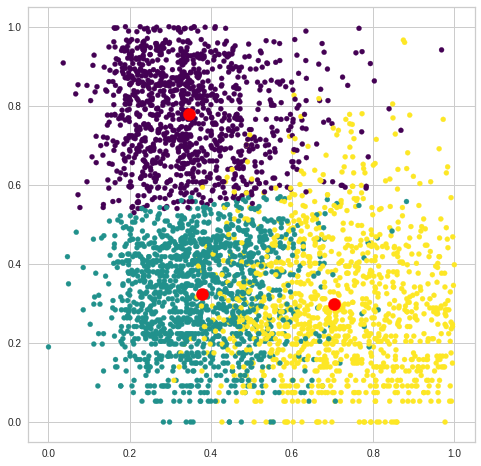

In [130]:
#plotting the segments
plt.figure(figsize=(8,8))
plt.scatter(df_final.iloc[:,2], 
            df_final.iloc[:,1],
            c=kmeans_2.labels_,
            cmap='viridis',s=25)

# Plot the clusters 
plt.scatter(kmeans_2.cluster_centers_[:, 2], 
            kmeans_2.cluster_centers_[:, 1], 
            s=150,                             # Set centroid size
            c='red')                   #Set centroid colour
       
plt.show()

In [131]:
#assigning cluster numbers to old unscaled dataset
df_new['ClusterNo']=kmeans_2.labels_

In [132]:
df_new

,CustomerID,Frequency,total_amount,recent_purchase,Frequency_sqrt,recent_purchase_sqrt,total_amount_sqrt,ClusterNo
2,12348.0,31,1797.24,74,5.567764,8.602325,42.393867,2
3,12349.0,73,1757.55,18,8.544004,4.242641,41.923144,2
4,12350.0,17,334.40,309,4.123106,17.578396,18.286607,0
5,12352.0,85,2506.04,35,9.219544,5.916080,50.060364,2
6,12353.0,4,89.00,203,2.000000,14.247807,9.433981,0
...,...,...,...,...,...,...,...,...
4333,18278.0,9,173.90,73,3.000000,8.544004,13.187115,1
4334,18280.0,10,180.60,277,3.162278,16.643317,13.438750,0
4335,18281.0,7,80.82,180,2.645751,13.416408,8.989994,0
4336,18282.0,12,178.05,7,3.464102,2.645751,13.343538,1


In [133]:
#let's check the common characteristics of each cluster
df_new.groupby('ClusterNo').agg({
    'recent_purchase': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'total_amount': ['mean', 'min', 'max','count']
})

recent_purchase            Frequency          total_amount          \
                     mean  min  max       mean min  max         mean     min   
ClusterNo                                                                      
0              223.107376  101  360  22.549953   1  155   391.525649    3.75   
1               43.730627    0  117  26.483395   1   93   452.247751    0.00   
2               42.299024    0  336  96.508429   4  219  1468.723469  271.19   

                          
               max count  
ClusterNo                 
0          2661.24  1071  
1          2207.40  1355  
2          2836.69  1127

As we can see, it seems that most of the customers in cluster zero have not recently purchased anything(their last purchase date is high) and the frequency, and the total amount is also less. These customers do not contribute much to the company. But there is still a possibility that some of the customers in this category can be valuable. Let's find them. Let's consider those customers whose amount of transactions is high and the recent is less.

In [135]:
df_new[(df_new['ClusterNo']==0) &(df_new['total_amount']>392)&(df_new['recent_purchase']<223) ]

,CustomerID,Frequency,total_amount,recent_purchase,Frequency_sqrt,recent_purchase_sqrt,total_amount_sqrt,ClusterNo
8,12355.0,13,459.40,213,3.605551,14.594520,21.433618,0
54,12414.0,18,562.41,216,4.242641,14.696938,23.715185,0
62,12424.0,30,1760.96,162,5.477226,12.727922,41.963794,0
64,12426.0,30,582.73,194,5.477226,13.928388,24.139801,0
88,12453.0,43,707.09,133,6.557439,11.532563,26.591164,0
...,...,...,...,...,...,...,...,...
4225,18133.0,1,931.50,211,1.000000,14.525839,30.520485,0
4230,18142.0,15,1019.52,156,3.872983,12.489996,31.929923,0
4238,18151.0,38,653.35,134,6.164414,11.575837,25.560712,0
4287,18218.0,20,641.92,210,4.472136,14.491377,25.336140,0


In [136]:
#creating the final dataframe by merging cluster number with original dataset
clusters_df= pd.merge(df, df_new[['CustomerID', 'ClusterNo']], on = 'CustomerID')
clusters_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,date,day_of_week,hour,min,net_amount,time_diff,ClusterNo
0,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom,2010,12,1,2,9,0,204.00,373 days 03:50:00,1
1,549190,22843,BISCUIT TIN VINTAGE GREEN,2,2011-04-07 10:13:00,6.75,13748.0,United Kingdom,2011,4,7,3,10,13,13.50,246 days 02:37:00,1
2,549190,22841,ROUND CAKE TIN VINTAGE GREEN,2,2011-04-07 10:13:00,7.95,13748.0,United Kingdom,2011,4,7,3,10,13,15.90,246 days 02:37:00,1
3,549190,22839,3 TIER CAKE TIN GREEN AND CREAM,2,2011-04-07 10:13:00,14.95,13748.0,United Kingdom,2011,4,7,3,10,13,29.90,246 days 02:37:00,1
4,549190,22423,REGENCY CAKESTAND 3 TIER,2,2011-04-07 10:13:00,12.75,13748.0,United Kingdom,2011,4,7,3,10,13,25.50,246 days 02:37:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168796,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011,12,9,4,12,16,15.00,0 days 00:34:00,1
168797,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011,12,9,4,12,16,10.20,0 days 00:34:00,1
168798,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011,12,9,4,12,16,10.20,0 days 00:34:00,1
168799,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,2011,12,9,4,12,16,24.96,0 days 00:34:00,1


# **SUMMARY**



*   'Cluster 0' Customers- Their recent purchase date is too old. They do not purchase very frequently and the amount they spend is not high. We can classify them as Low Valued Customers.

*   'Cluster 1' Customers- These customers have placed an order more recently, but the frequency with which they order is not that great. They spend comparatively more than cluster 0 customers. We classify them as Medium Valued Customers.


*   'Cluster 2' Customers- These customers are the most loyal to the company. They place the orders more frequently and recency is also low. The average amount they spend on an order is also high. They are 'High Valued Customers'.


*   We can reward Cluster 2 customers. They can adapt to new products. Moreover, they help to promote the company.

*   For cluster 1 customers, we can offer membership or loyalty programs. We can recommend them related products to upsell them. This initiative helps to make them loyal customers of the company. 


*   In cluster 0, we have some customers who spent heavily but not recently. We need to identify them and initiate a reactivation campaign. We can also offer them promotions and conduct surveys to know what went wrong. In this way, we can avoid losing them to competitors.










